# Heart Failure Predictor

2602069596 – Jack Julius Ryadi Lie

2602078726 – Albert Yulius Ramahalim

2602082944 – Christoffer Edbert Karuniawan

## Download Dataset & Import Library

In [3]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction --unzip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 12.5MB/s]


In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import skew
from itertools import product
import random
from tqdm import tqdm
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

## Exploratory Data Analysis

In [5]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.shape

(918, 12)

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Check null values and duplicate

In [9]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


There is no need to replace null value with another value.

In [10]:
print('No. of duplicates in the dataset:', df.duplicated().sum())

No. of duplicates in the dataset: 0


### Age

Age of patients, given in years.

In [12]:
print('Oldest patient         :', df['Age'].max(), 'years')
print('Youngest patient       :', df['Age'].min(), 'years')
print('Average age of patients:', df['Age'].mean(), 'years')

Oldest patient         : 77 years
Youngest patient       : 28 years
Average age of patients: 53.510893246187365 years


The youngest patient is 28 years old. Thus, this dataset has no idea about teenagers, babies, and people younger than 28 years old.

In [13]:
df[['Age', 'HeartDisease']].groupby('Age', as_index = False).mean()

,Age,HeartDisease
0,28,0.000000
1,29,0.000000
2,30,0.000000
3,31,0.500000
4,32,0.400000
5,33,0.500000
6,34,0.285714
7,35,0.363636
8,36,0.333333
9,37,0.090909


The age is given in integers (numerical).

In [16]:
fig = px.box(df, y='Age', x='HeartDisease', title=f'Distribution of Age')
fig.show()

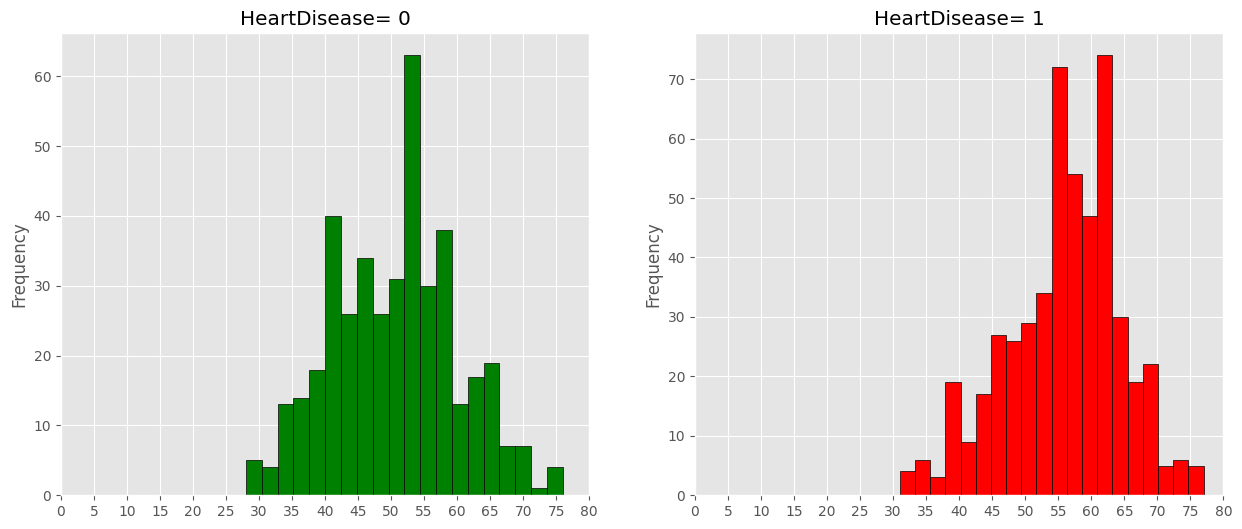

In [19]:
f, ax = plt.subplots(1,2,figsize=(15,6))

df[df['HeartDisease']==0]['Age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='green')
ax[0].set_title('HeartDisease= 0')
ax[0].set_xticks(list(range(0,85,5)))

df[df['HeartDisease']==1]['Age'].plot.hist(ax=ax[1], bins=20, edgecolor='black', color='red')
ax[1].set_title('HeartDisease= 1')
ax[1].set_xticks(list(range(0,85,5)))

plt.show()

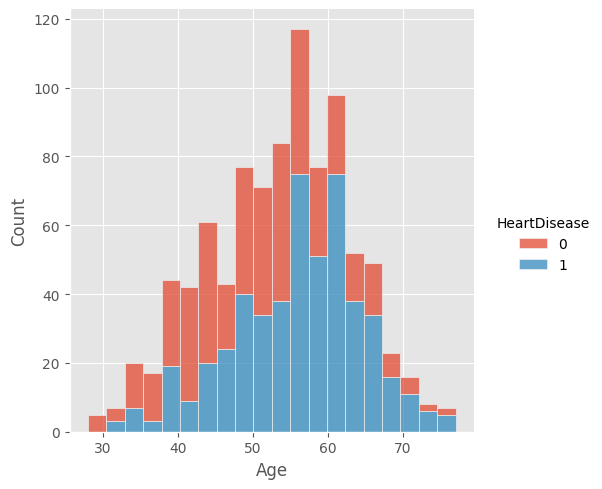

In [20]:
sns.displot(data=df, x='Age', hue='HeartDisease', multiple='stack', bins=20)
plt.show()

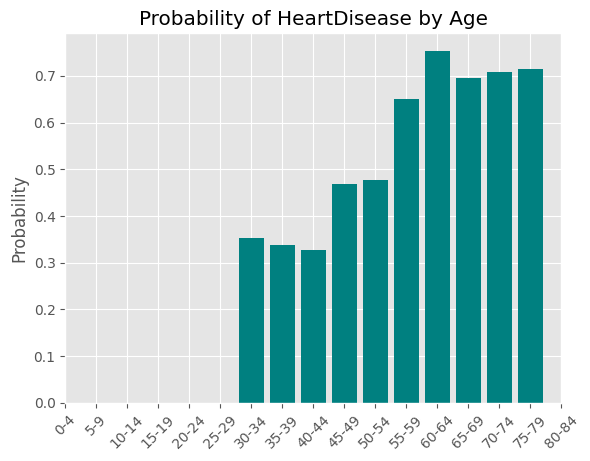

In [24]:
data = df[['Age', 'HeartDisease']].copy()
bins = pd.cut(data['Age'], bins=range(0, 90, 5), right=False)
grouped_data = data.groupby(bins)['HeartDisease'].mean().reset_index()
plt.bar(range(len(grouped_data)), grouped_data['HeartDisease'], color='teal')
plt.xticks(ticks=range(len(grouped_data)), labels=[f'{interval.left}-{interval.right-1}' for interval in grouped_data['Age']], rotation=45)
plt.title('Probability of HeartDisease by Age')
plt.ylabel('Probability')
plt.show()

The age 60-64 has the highest probability for a person to have heart disease.

### Sex

There are two sex values, Male (M) and Female (F).

In [25]:
df['Sex'].value_counts(dropna=False)

Sex
M    725
F    193
Name: count, dtype: int64

In [26]:
df[['Sex', 'HeartDisease']].groupby('Sex', as_index=False).mean()

,Sex,HeartDisease
0,F,0.259067
1,M,0.631724


In [27]:
pd.crosstab(df.Sex, df.HeartDisease, margins=True).style.background_gradient(cmap='Wistia')

HeartDisease,0,1,All
Sex,,,
F,143,50,193
M,267,458,725
All,410,508,918


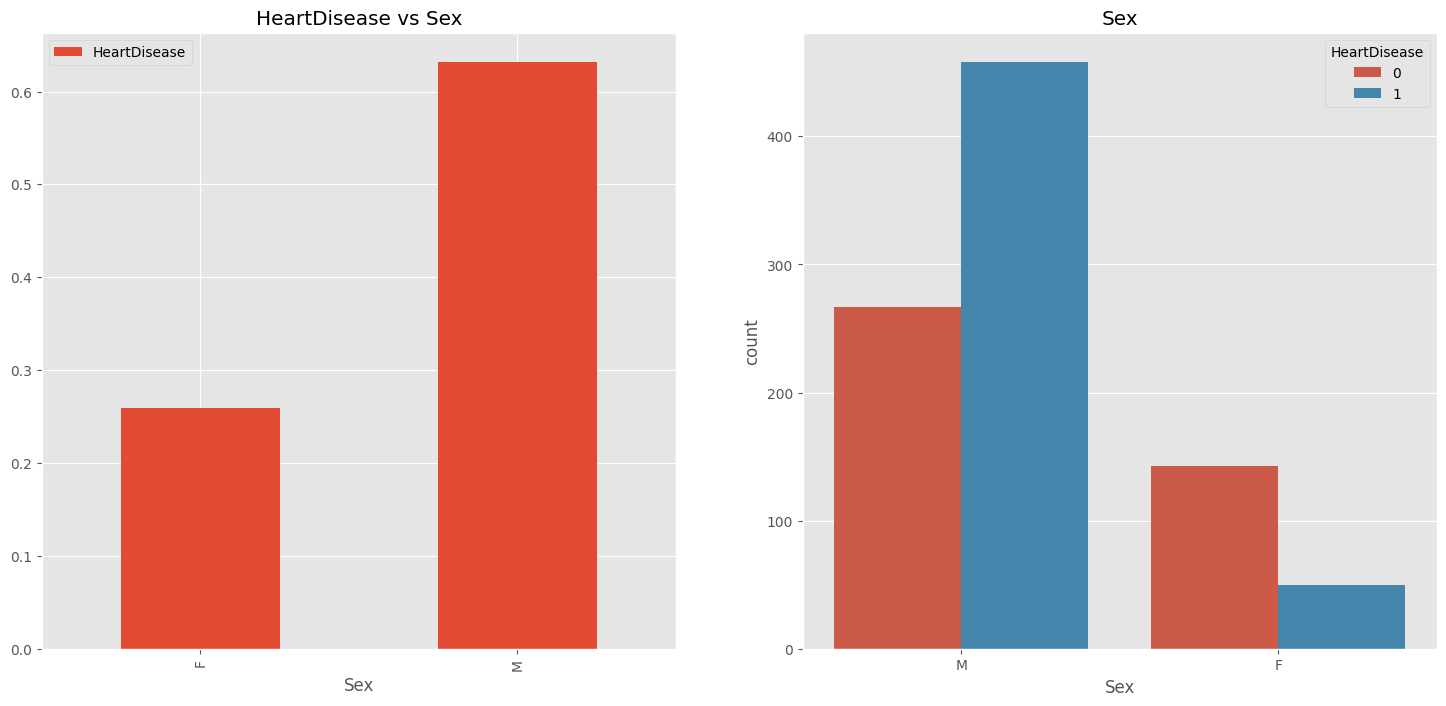

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))

df[['Sex','HeartDisease']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('HeartDisease vs Sex')

sns.countplot(df,x='Sex',hue='HeartDisease',ax=ax[1])
ax[1].set_title('Sex')

plt.show()

Male has higher probability of having heart disease than Female.

### Chest Pain Type

In [29]:
df[['ChestPainType', 'HeartDisease']].groupby('ChestPainType', as_index = False).mean()

,ChestPainType,HeartDisease
0,ASY,0.790323
1,ATA,0.138728
2,NAP,0.354680
3,TA,0.434783


There are 4 types of Chest Pain Type:
1. ASY: Asymptomatic
2. ATA: Atypical Angina
3. NAP: Non-Anginal Pain
4. TA: Typical Angina

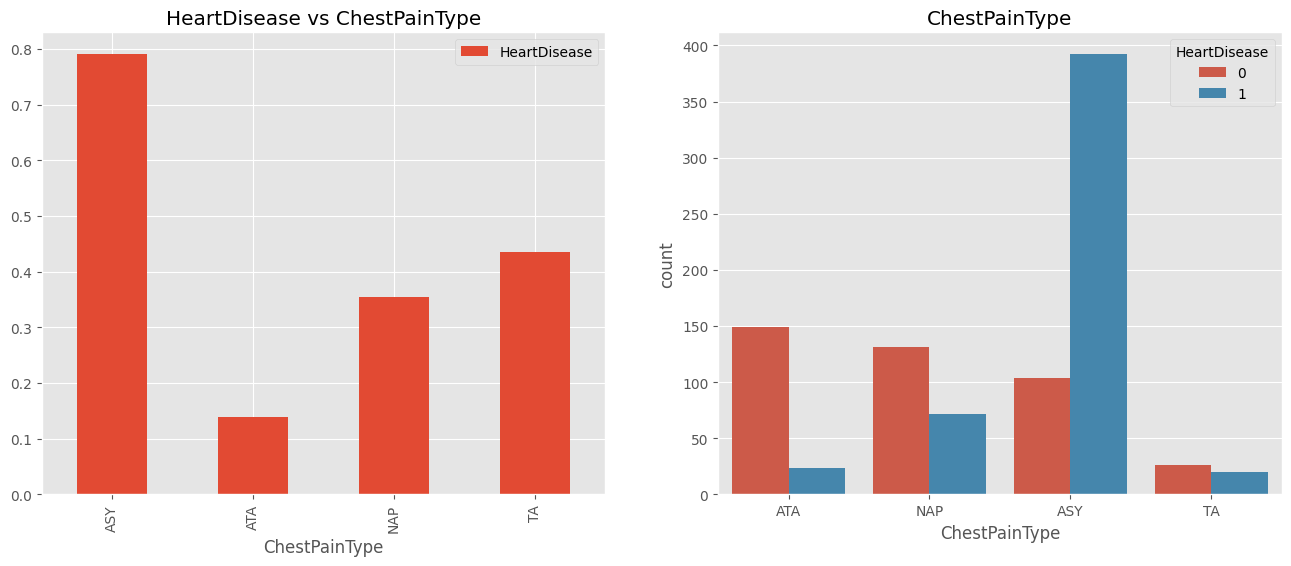

In [30]:
f, ax=plt.subplots(1, 2, figsize=(16,6))

df[['ChestPainType','HeartDisease']].groupby(['ChestPainType']).mean().plot.bar(ax=ax[0])
ax[0].set_title('HeartDisease vs ChestPainType')

sns.countplot(df, x='ChestPainType', hue='HeartDisease', ax=ax[1])
ax[1].set_title('ChestPainType')
plt.show()

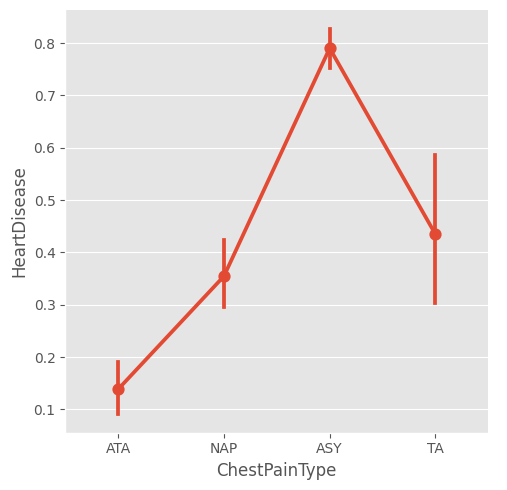

In [31]:
sns.catplot(data=df, x='ChestPainType', y='HeartDisease', kind='point')

Having Asymptomatic increases the risk of heart disease.

### RestingBP

RestingBP = Resting Blood Pressure, it was measured in mmHg.

In [34]:
df[['RestingBP', 'HeartDisease']].groupby('RestingBP', as_index=False).mean()

,RestingBP,HeartDisease
0,0,1.0
1,80,0.0
2,92,1.0
3,94,0.0
4,95,1.0
...,...,...
62,180,0.5
63,185,1.0
64,190,0.5
65,192,1.0


In [35]:
print('Highest Resting Blood Pressure: ', df['RestingBP'].max(), 'mmHg')
print('Lowest Resting Blood Pressure : ', df['RestingBP'].min(), 'mmHg')
print('Average Resting Blood Pressure: ', df['RestingBP'].mean(), 'mmHg')

Highest Resting Blood Pressure:  200 mmHg
Lowest Resting Blood Pressure :  0 mmHg
Average Resting Blood Pressure:  132.39651416122004 mmHg


Resting Blood Pressure = 0 does not make sense. This is a null value in disguise. We should change this value to another value such as mean.

In [36]:
print('Number of patients having 0 Resting Blood Pressure: ', sum([1 if i == 0 else 0 for i in df['RestingBP']]))

Number of patients having 0 Resting Blood Pressure:  1


In [37]:
fig = px.box(df,y='RestingBP',x='HeartDisease',title=f'Distribution of RestingBP',color='Sex')
fig.show()

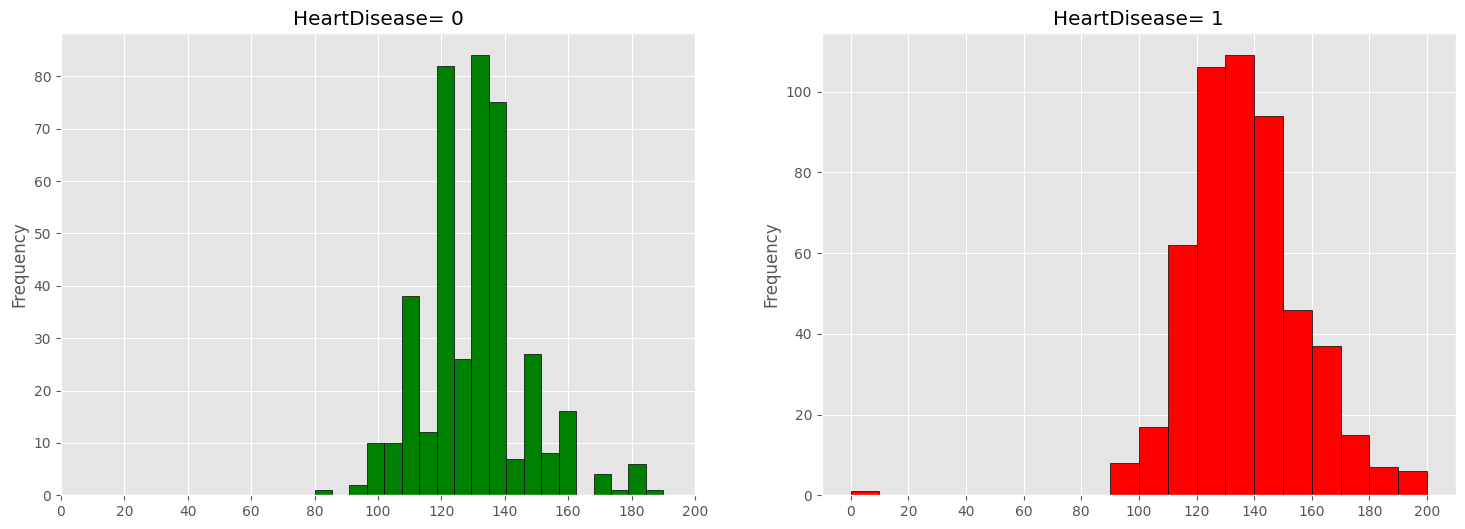

In [43]:
f, ax=plt.subplots(1, 2, figsize=(18, 6))

df[df['HeartDisease']==0]['RestingBP'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='green')
ax[0].set_title('HeartDisease= 0')
ax[0].set_xticks(range(0, 205, 20))

df[df['HeartDisease']==1]['RestingBP'].plot.hist(ax=ax[1], bins=20, edgecolor='black', color='red')
ax[1].set_title('HeartDisease= 1')
ax[1].set_xticks(range(0, 205, 20))

plt.show()

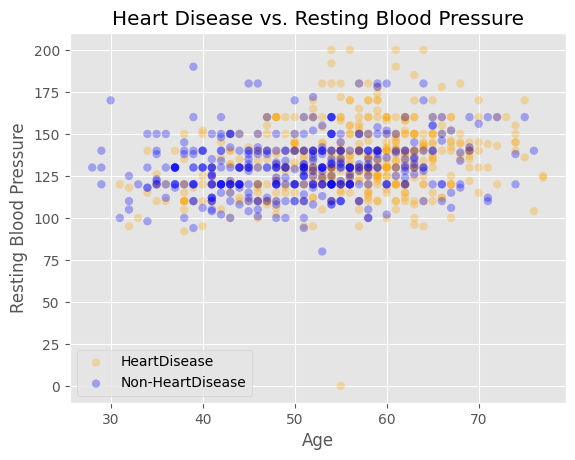

In [44]:
tmp_df_1 = df[df['HeartDisease'] == 1]
tmp_df_0 = df[df['HeartDisease'] == 0]

plt.scatter(tmp_df_1.Age, tmp_df_1.RestingBP, color='orange', label='HeartDisease', edgecolors='none', alpha = 0.3)
plt.scatter(tmp_df_0.Age, tmp_df_0.RestingBP, color='blue', label='Non-HeartDisease', edgecolors='none', alpha = 0.3)

plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Heart Disease vs. Resting Blood Pressure')
plt.legend()
plt.show()

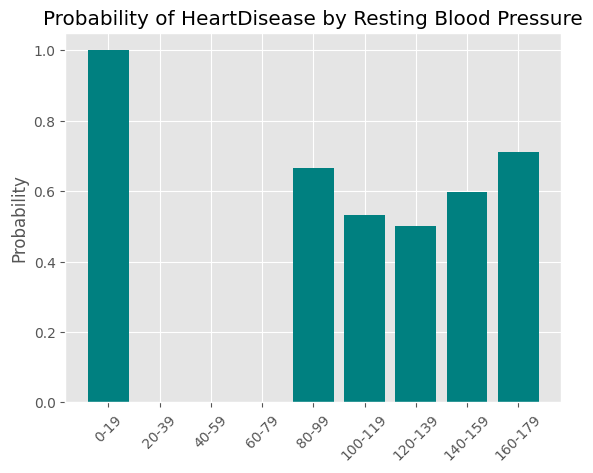

In [45]:
data = df[['RestingBP', 'HeartDisease']].copy()
bins = pd.cut(data['RestingBP'], bins=range(0, 200, 20), right=False)
grouped_data = data.groupby(bins)['HeartDisease'].mean().reset_index()
plt.bar(range(len(grouped_data)), grouped_data['HeartDisease'], color='teal')
plt.xticks(ticks=range(len(grouped_data)), labels=[f'{interval.left}-{interval.right-1}' for interval in grouped_data['RestingBP']], rotation=45)
plt.title('Probability of HeartDisease by Resting Blood Pressure')
plt.ylabel('Probability')
plt.show()

In [41]:
print('Second minimum of Resting Blood Pressure: ', min([i if i != 0 else 200 for i in df['RestingBP']]))

Second minimum of Resting Blood Pressure:  80


As we can see in the bar chart, the one who has the Resting Blood Pressure too high or too low increase the probability of having heart disease

### Cholesterol

Cholesterol is serum cholesterol (mm/dl)

In [ ]:
df[['Cholesterol', 'HeartDisease']].groupby('Cholesterol', as_index = False).mean()

,Cholesterol,HeartDisease
0,0,0.883721
1,85,0.000000
2,100,0.500000
3,110,1.000000
4,113,1.000000
...,...,...
217,491,1.000000
218,518,1.000000
219,529,1.000000
220,564,0.000000


In [46]:
print('Highest cholesterol: ', df['Cholesterol'].max(), 'mm/dl')
print('Lowest cholesterol : ', df['Cholesterol'].min(), 'mm/dl')
print('Average cholesterol: ', df['Cholesterol'].mean(), 'mm/dl')

Highest cholesterol:  603 mm/dl
Lowest cholesterol :  0 mm/dl
Average cholesterol:  198.7995642701525 mm/dl


The cholesterol = 0 does not make sense. This is also a null value in disguise. We should change this to any value such as mean.

In [ ]:
print('Number of patients having 0 Cholesterol: ', sum([1 if i == 0 else 0 for i in df['Cholesterol']]))

Number of patients having 0 Cholesterol:  172


In [47]:
fig = px.box(df,y='Cholesterol',x='HeartDisease',title=f'Distribution of Cholesterol')
fig.show()

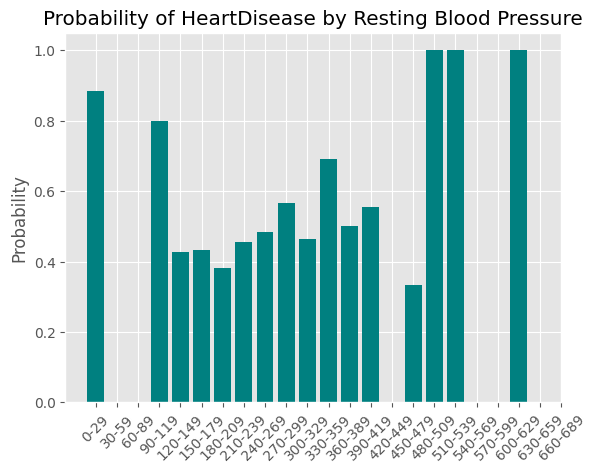

In [48]:
data = df[['Cholesterol', 'HeartDisease']].copy()
bins = pd.cut(data['Cholesterol'], bins=range(0, 700, 30), right=False)
grouped_data = data.groupby(bins)['HeartDisease'].mean().reset_index()
plt.bar(range(len(grouped_data)), grouped_data['HeartDisease'], color='teal')
plt.xticks(ticks=range(len(grouped_data)), labels=[f'{interval.left}-{interval.right-1}' for interval in grouped_data['Cholesterol']], rotation=45)
plt.title('Probability of HeartDisease by Resting Blood Pressure')
plt.ylabel('Probability')
plt.show()

Again, the bar chart is suspicious because it has 0 or 1 probability for some high cholesterols.

In [49]:
data = df['Cholesterol']
print('The number of patients having >= 600 Cholesterol:', sum([1 if i >= 600 else 0 for i in data]))
print('The number of patients having Cholesterol in range 570 and 599 inclusive:', sum([1 if 570 <= i and i <= 599 else 0 for i in data]))
print('The number of patients having Cholesterol in range 540 and 569 inclusive:', sum([1 if 540 <= i and i <= 569 else 0 for i in data]))
print('The number of patients having Cholesterol in range 510 and 539 inclusive:', sum([1 if 510 <= i and i <= 539 else 0 for i in data]))
print('The number of patients having Cholesterol in range 480 and 509 inclusive:', sum([1 if 480 <= i and i <= 509 else 0 for i in data]))

The number of patients having >= 600 Cholesterol: 1
The number of patients having Cholesterol in range 570 and 599 inclusive: 0
The number of patients having Cholesterol in range 540 and 569 inclusive: 1
The number of patients having Cholesterol in range 510 and 539 inclusive: 2
The number of patients having Cholesterol in range 480 and 509 inclusive: 1


The data is having some outliers in some high value for the Cholesterol due to the number of patients there is too small.

### FastingBS

Fasting Blood Sugar. The value is 1 if FastingBS > 120 mg/dl, and 0 otherwise.

In [ ]:
df[['FastingBS', 'HeartDisease']].groupby('FastingBS', as_index = False).mean()

,FastingBS,HeartDisease
0,0,0.480114
1,1,0.794393


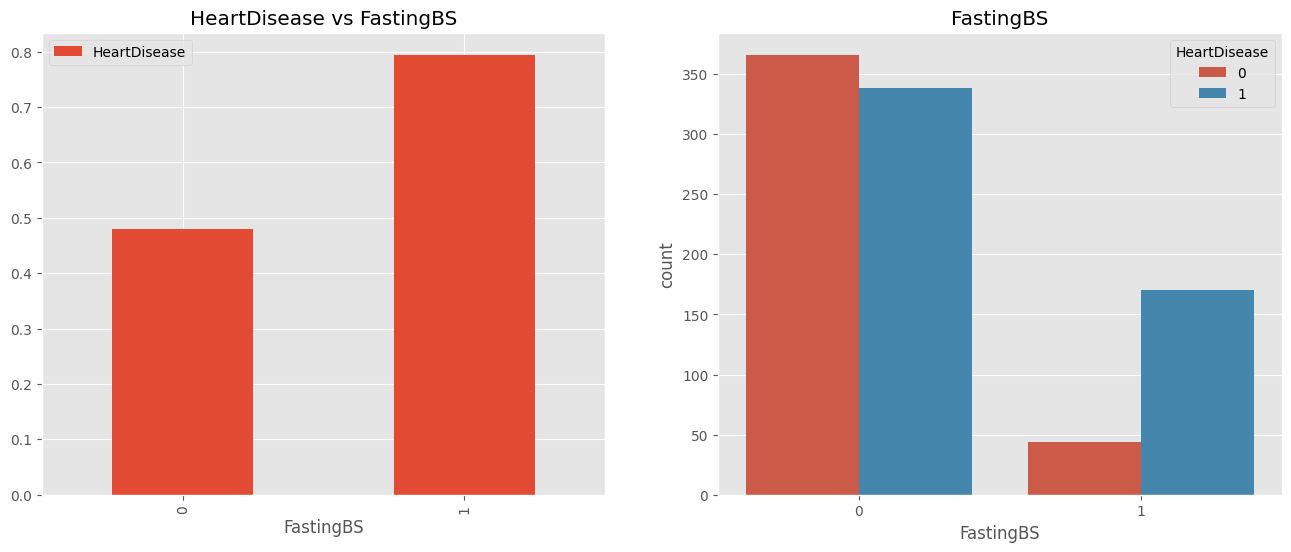

In [50]:
f,ax=plt.subplots(1,2,figsize=(16,6))
df[['FastingBS','HeartDisease']].groupby(['FastingBS']).mean().plot.bar(ax=ax[0])
ax[0].set_title('HeartDisease vs FastingBS')
sns.countplot(df,x='FastingBS',hue='HeartDisease',ax=ax[1])
ax[1].set_title('FastingBS')
plt.show()

A person which has Fasting Blood Sugar has higher potential of having heart disease than the one who does not.

### RestingECG

RestingECG = resting electrocardiogram results.

There are three kinds of values:
1. Normal
2. ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
3. LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [51]:
df[['RestingECG', 'HeartDisease']].groupby('RestingECG', as_index = False).mean()

,RestingECG,HeartDisease
0,LVH,0.563830
1,Normal,0.516304
2,ST,0.657303


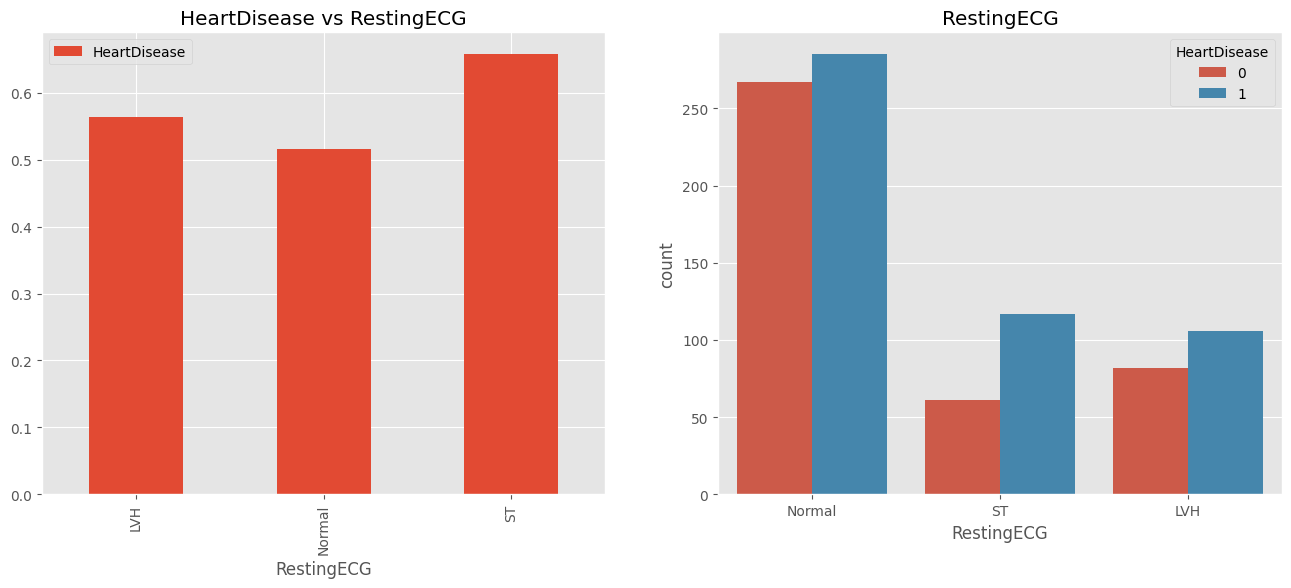

In [53]:
f,ax=plt.subplots(1,2,figsize=(16,6))

df[['RestingECG','HeartDisease']].groupby(['RestingECG']).mean().plot.bar(ax=ax[0])
ax[0].set_title('HeartDisease vs RestingECG')

sns.countplot(df,x='RestingECG',hue='HeartDisease',ax=ax[1])
ax[1].set_title('RestingECG')

plt.show()

For three kinds of the type, the probability having heart disease is always higher

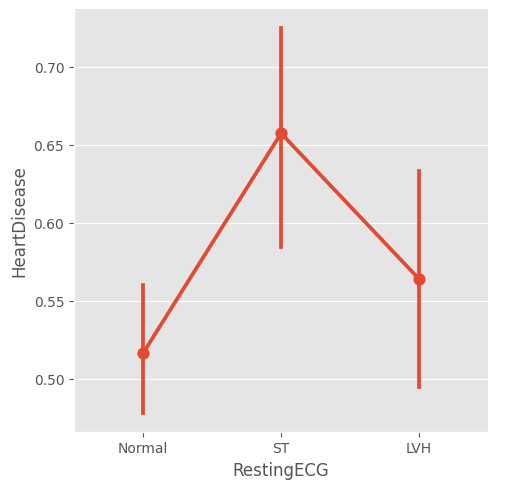

In [54]:
sns.catplot(data=df, x='RestingECG', y='HeartDisease', kind='point');

### Max HR

MaxHR = maximum heart rate achieved

In [55]:
print('Highest maximum heart rate: ', df['MaxHR'].max())
print('Lowest maximum heart rate : ', df['MaxHR'].min())
print('Average maximum heart rate: ', df['MaxHR'].mean())

Highest maximum heart rate:  202
Lowest maximum heart rate :  60
Average maximum heart rate:  136.80936819172112


In [56]:
df[['MaxHR', 'HeartDisease']].groupby('MaxHR', as_index = False).mean()

,MaxHR,HeartDisease
0,60,1.0
1,63,1.0
2,67,1.0
3,69,0.0
4,70,1.0
...,...,...
114,190,0.0
115,192,0.0
116,194,0.0
117,195,1.0


In [58]:
fig = px.box(df,y='MaxHR',x='HeartDisease',title=f'Distribution of MaxHR')
fig.show()

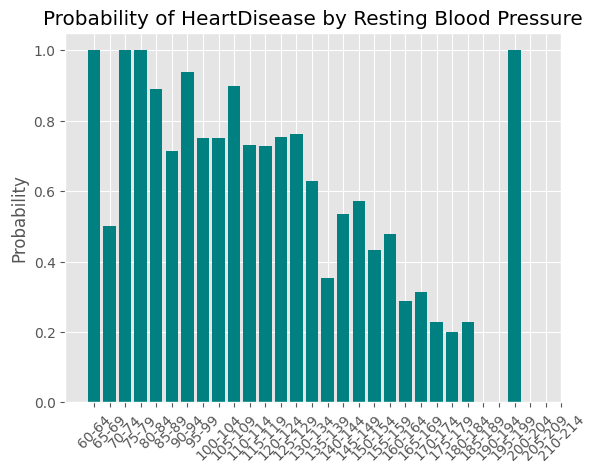

In [59]:
data = df[['MaxHR', 'HeartDisease']].copy()
bins = pd.cut(data['MaxHR'], bins=range(60, 220, 5), right=False)
grouped_data = data.groupby(bins)['HeartDisease'].mean().reset_index()
plt.bar(range(len(grouped_data)), grouped_data['HeartDisease'], color='teal')
plt.xticks(ticks=range(len(grouped_data)), labels=[f'{interval.left}-{interval.right-1}' for interval in grouped_data['MaxHR']], rotation=45)
plt.title('Probability of HeartDisease by Resting Blood Pressure')
plt.ylabel('Probability')
plt.show()

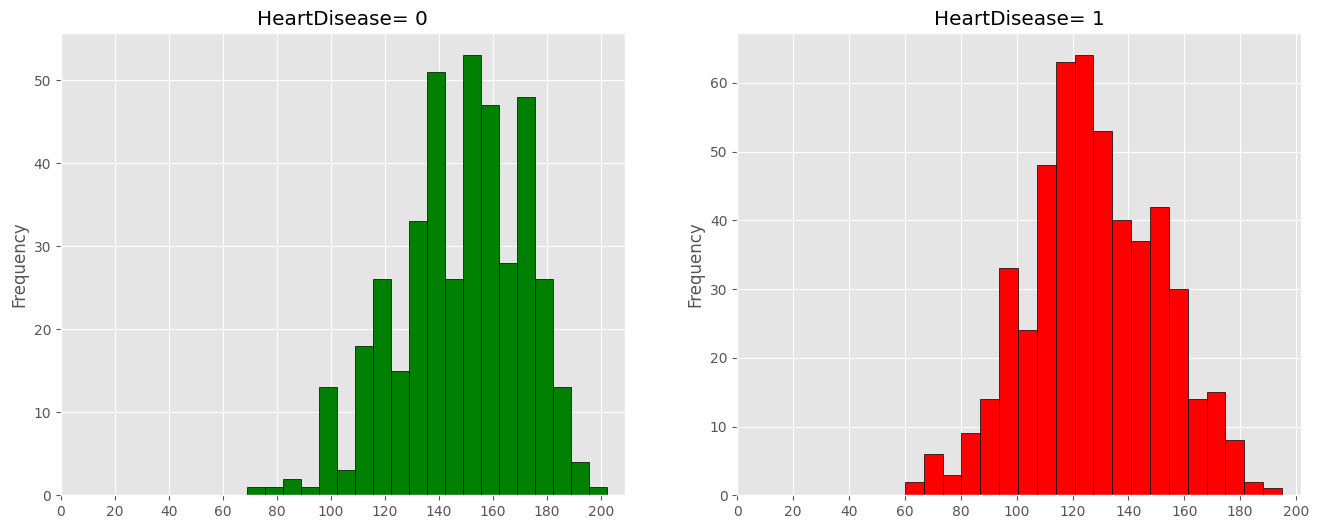

In [62]:
f, ax=plt.subplots(1, 2, figsize=(16,6))

df[df['HeartDisease']==0]['MaxHR'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='green')
ax[0].set_title('HeartDisease= 0')
ax[0].set_xticks(range(0, 205, 20))

df[df['HeartDisease']==1]['MaxHR'].plot.hist(ax=ax[1], bins=20, edgecolor='black', color='red')
ax[1].set_title('HeartDisease= 1')
ax[1].set_xticks(range(0, 205, 20))
plt.show()

### Exercise Angina

Exercise-induced angina? Yes (Y) or No (N)

In [ ]:
df[['ExerciseAngina', 'HeartDisease']].groupby('ExerciseAngina', as_index = False).mean()

,ExerciseAngina,HeartDisease
0,N,0.351005
1,Y,0.851752


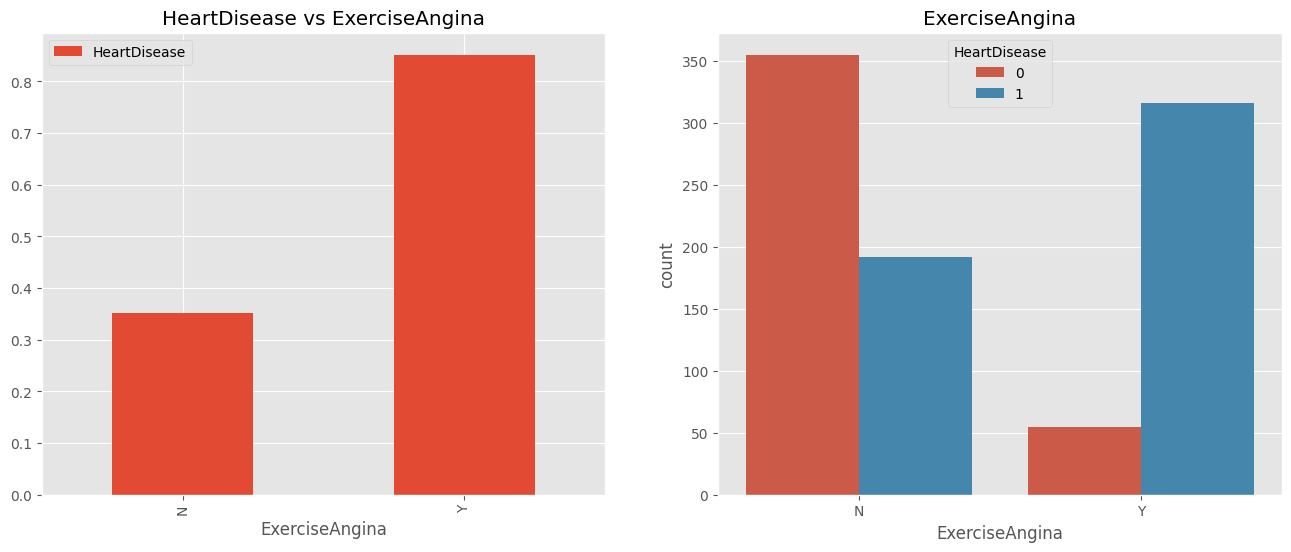

In [63]:
f, ax=plt.subplots(1, 2, figsize=(16,6))

df[['ExerciseAngina','HeartDisease']].groupby(['ExerciseAngina']).mean().plot.bar(ax=ax[0])
ax[0].set_title('HeartDisease vs ExerciseAngina')

sns.countplot(df,x='ExerciseAngina',hue='HeartDisease',ax=ax[1])
ax[1].set_title('ExerciseAngina')

plt.show()

Exercise-induced angina increases the probability of having heart disease.

### Oldpeak

Oldpeak = ST (Numeric value measured in depression)

In [ ]:
df[['Oldpeak', 'HeartDisease']].groupby('Oldpeak', as_index = False).mean()

,Oldpeak,HeartDisease
0,-2.6,1.000000
1,-2.0,1.000000
2,-1.5,1.000000
3,-1.1,0.000000
4,-1.0,1.000000
5,-0.9,1.000000
6,-0.8,1.000000
7,-0.7,1.000000
8,-0.5,0.500000
9,-0.1,0.000000


In [ ]:
print('Highest Oldpeak: ', df['Oldpeak'].max())
print('Lowest Oldpeak: ', df['Oldpeak'].min())
print('Average Oldpeak: ', df['Oldpeak'].mean())

Highest Oldpeak:  6.2
Lowest Oldpeak:  -2.6
Average Oldpeak:  0.8873638344226579


In [64]:
fig = px.box(df,y='Oldpeak',x='HeartDisease',title=f'Distribution of Oldpeak')
fig.show()

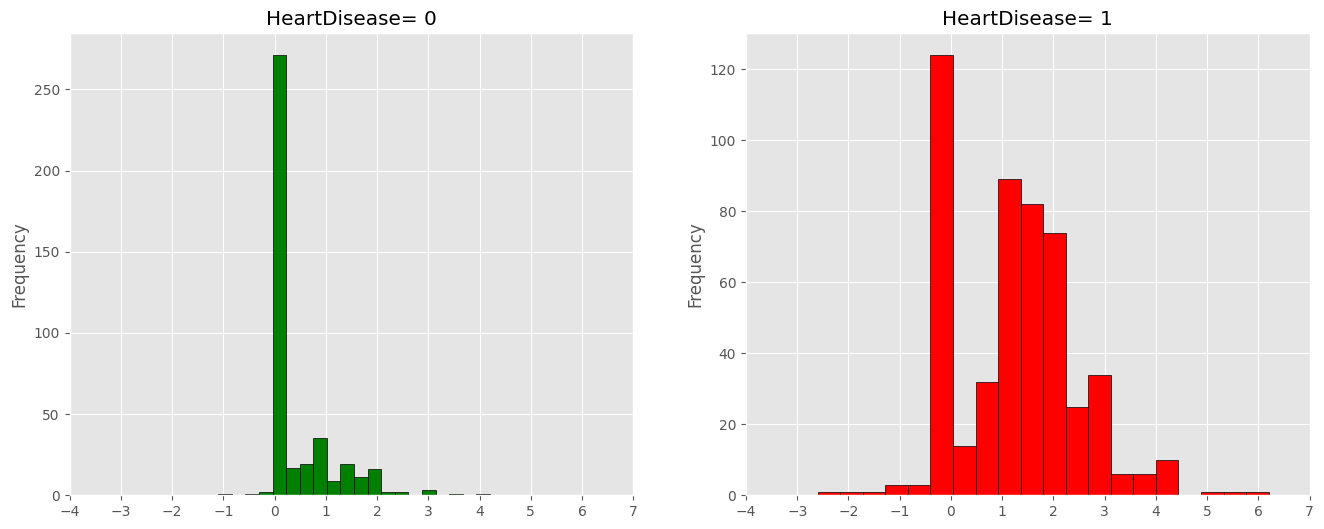

In [66]:
f, ax=plt.subplots(1, 2, figsize=(16, 6))

df[df['HeartDisease']==0]['Oldpeak'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='green')
ax[0].set_title('HeartDisease= 0')
ax[0].set_xticks(range(-4, 8, 1))

df[df['HeartDisease']==1]['Oldpeak'].plot.hist(ax=ax[1], bins=20, edgecolor='black', color='red')
ax[1].set_title('HeartDisease= 1')
ax[1].set_xticks(range(-4, 8, 1))

plt.show()

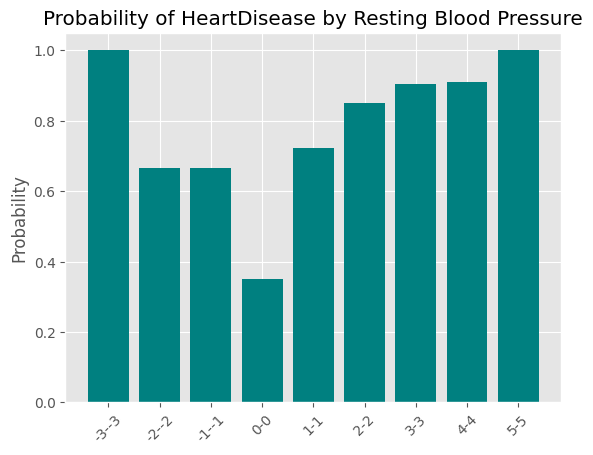

In [67]:
data = df[['Oldpeak', 'HeartDisease']].copy()
bins = pd.cut(data['Oldpeak'], bins=range(-3, 7, 1), right=False)
grouped_data = data.groupby(bins)['HeartDisease'].mean().reset_index()
plt.bar(range(len(grouped_data)), grouped_data['HeartDisease'], color='teal')
plt.xticks(ticks=range(len(grouped_data)), labels=[f'{interval.left}-{interval.right-1}' for interval in grouped_data['Oldpeak']], rotation=45)
plt.title('Probability of HeartDisease by Resting Blood Pressure')
plt.ylabel('Probability')
plt.show()

### ST Slope

ST Slope = the slope of the peak exercise ST segment <br>

Three kinds of values:
1. Down
2. Flat
3. Up

In [ ]:
df[['ST_Slope', 'HeartDisease']].groupby('ST_Slope', as_index = False).mean()

,ST_Slope,HeartDisease
0,Down,0.777778
1,Flat,0.828261
2,Up,0.197468


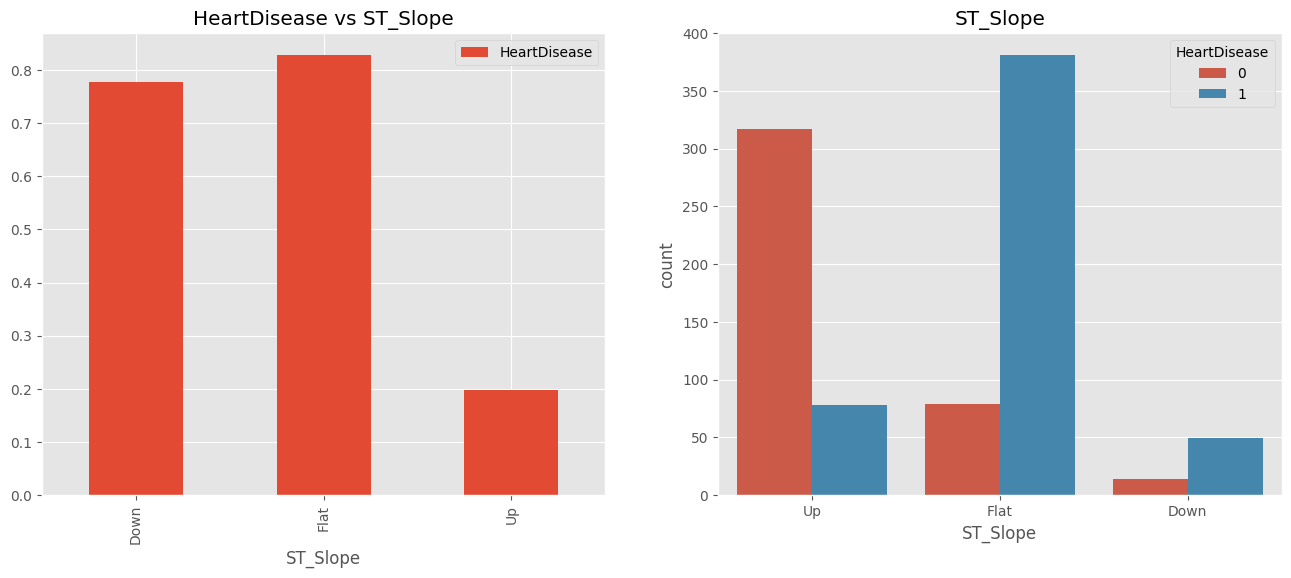

In [68]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))

df[['ST_Slope','HeartDisease']].groupby(['ST_Slope']).mean().plot.bar(ax=ax[0])
ax[0].set_title('HeartDisease vs ST_Slope')

sns.countplot(df,x='ST_Slope',hue='HeartDisease',ax=ax[1])
ax[1].set_title('ST_Slope')

plt.show()

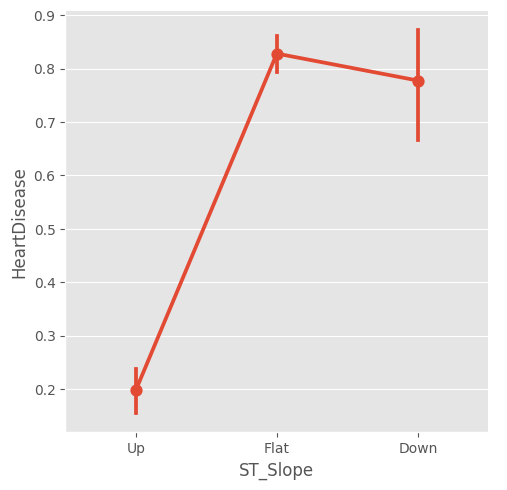

In [69]:
sns.catplot(data=df, x='ST_Slope', y='HeartDisease', kind='point')

Up value is the only one that has the lowest probability of having heart disease.

### Correlation between features

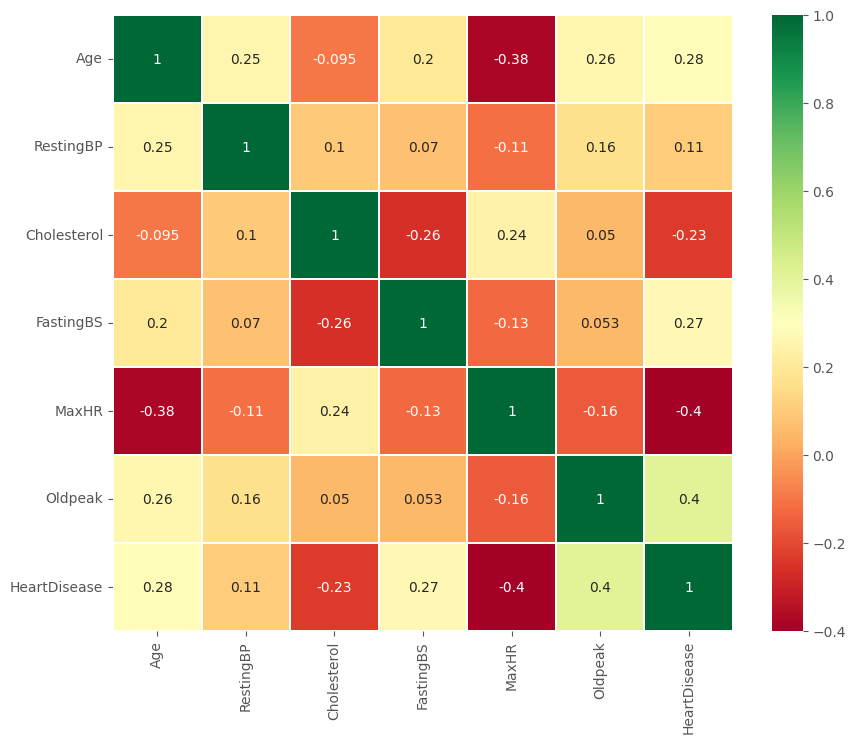

In [70]:
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Here we can see heart disease has a high negative correlation with MaxHR and somewhat negative correlation with cholesterol, whereas there is positive correatlation with Oldpeak, FastingBS, Age, and RestingBP.

In [71]:
fig=px.histogram(df, x='ChestPainType', color='Sex', hover_data=df.columns, title='Types of Chest Pain')
fig.show()

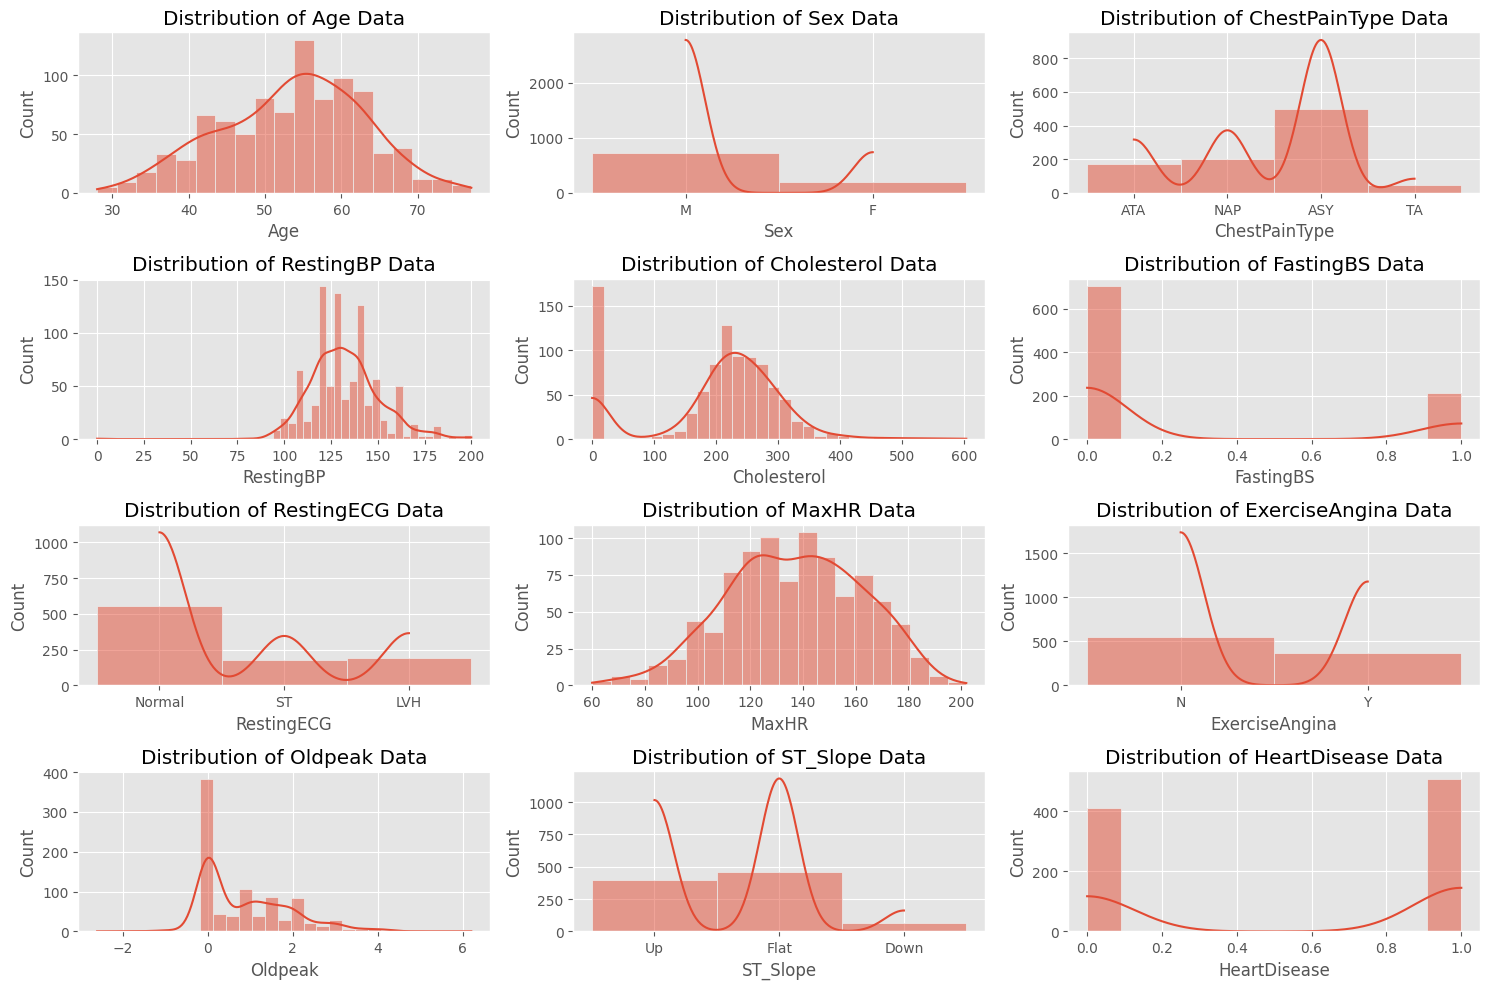

In [73]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    plt.title(f'Distribution of {col} Data')
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.plot()

## Data preprocessing

In [165]:
heart_df = pd.read_csv('heart.csv')
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Encoding

- `Sex` and `ExerciseAngina` are binary values. We use label encoding.

- For `ChestPainType`, `RestingECG`, and `ST_Slope`, we use one-hot encoding.

In [166]:
heart_df['Sex'] = heart_df['Sex'].replace(['M', 'F'], [0, 1])
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].replace(['N', 'Y'], [0, 1])

heart_df = pd.get_dummies(heart_df, columns=['ChestPainType', 'RestingECG', 'ST_Slope']) \
             .drop(columns=['ChestPainType_ASY', 'RestingECG_Normal', 'ST_Slope_Flat'])

### Correlation heatmap after encoding

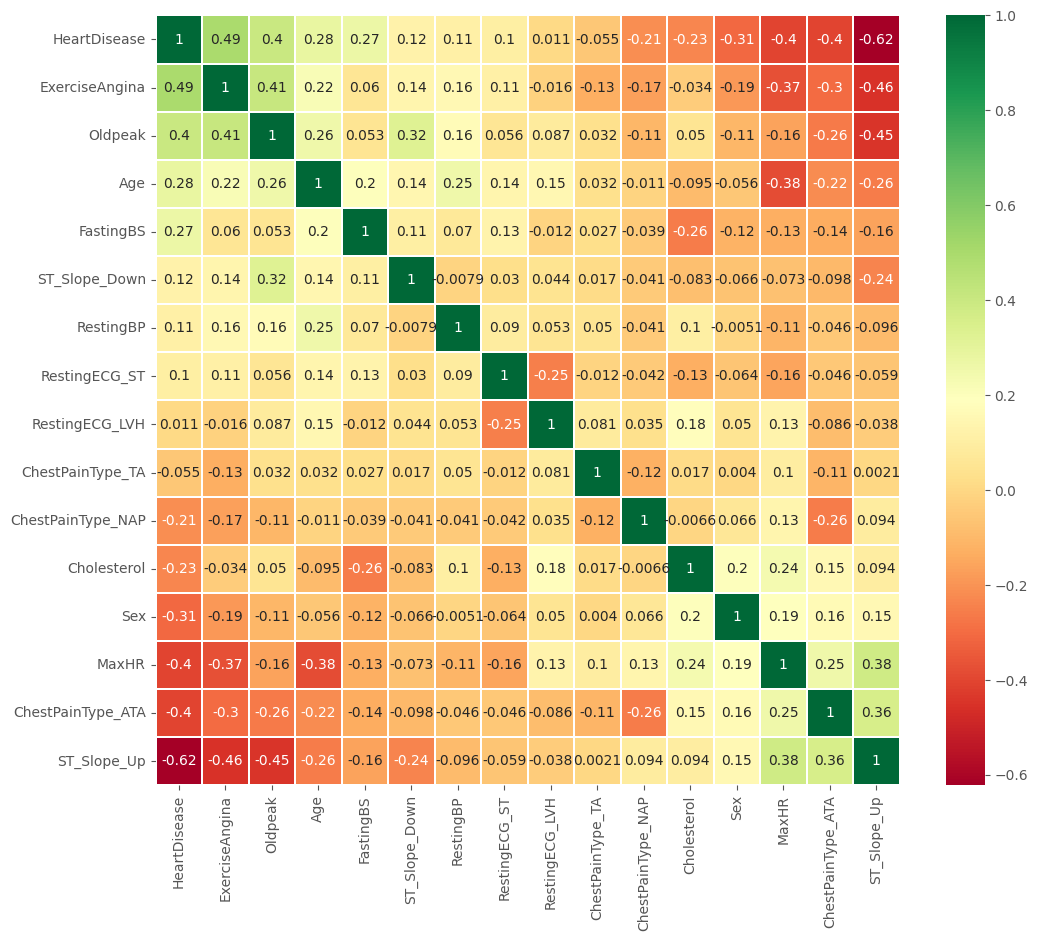

In [167]:
corr = heart_df.corr().sort_values(by=['HeartDisease'], ascending=False)
corr = corr.reindex(columns=corr.index)

sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.show()

### Splitting into train/test set

We use an 80:20 ratio for train:test.

In [168]:
X = heart_df.drop(columns=['HeartDisease'])
y = heart_df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

### Fill null values

In [170]:
has_zero = ['RestingBP', 'Cholesterol']
for column in has_zero:
    nonzero_count = np.count_nonzero(X_train[column])
    nonzero_mean = round(X_train[column].sum() / nonzero_count)

    print(f'Replacing zero values in {column} with {nonzero_mean}')
    X_train[column] = X_train[column].replace(0, nonzero_mean)
    X_test[column] = X_test[column].replace(0, nonzero_mean)

Replacing zero values in RestingBP with 133
Replacing zero values in Cholesterol with 244


### Skewness and log/sqrt transformation

In [79]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for column in numerical_columns:
    skewness = skew(X_train[column])
    print(f'{column:12}: {skewness:.5f}')

Age         : -0.21688
RestingBP   : 0.52365
Cholesterol : 1.45629
MaxHR       : -0.16529
Oldpeak     : 0.87788


`RestingBP`, `Cholesterol`, and `Oldpeak` has skewness $> 0.5$ (also visible in the EDA), so we can try using log and sqrt transformation to make the distributions more even.

In [80]:
def log_transform(df: pd.DataFrame, column: str):
    df[column] = np.log(df[column] - np.min(df[column]) + 1)

def sqrt_transform(df: pd.DataFrame, column: str):
    df[column] = np.sqrt(df[column] - np.min(df[column]))

sqrt_transform(X_train, 'RestingBP')
sqrt_transform(X_train, 'Cholesterol')
log_transform(X_train, 'Oldpeak')

sqrt_transform(X_test, 'RestingBP')
sqrt_transform(X_test, 'Cholesterol')
log_transform(X_test, 'Oldpeak')

for column in numerical_columns:
    skewness = skew(X_train[column])
    print(f'{column:12}: {skewness:.5f}')

Age         : -0.21688
RestingBP   : -0.20577
Cholesterol : -0.02587
MaxHR       : -0.16529
Oldpeak     : -0.00865


### Standardize numerical features

In [81]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_columns])

X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [82]:
X_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_ST,ST_Slope_Down,ST_Slope_Up
253,0.878109,0,0.454262,0.565897,0,0.601297,0,0.242541,True,False,False,False,False,False,True
562,0.562729,0,0.454262,0.617346,0,0.679240,1,1.125617,False,False,False,False,False,False,False
454,0.457602,0,0.251588,-0.737604,1,-0.528876,1,0.433601,False,False,False,False,False,False,False
346,0.562729,0,-0.642559,0.082774,0,-0.840648,0,-0.857868,False,False,False,False,False,False,False
378,1.719122,0,0.454262,0.082774,1,0.796154,1,1.125617,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,0.247348,0,-0.066519,-1.586469,0,-0.879619,0,-0.857868,False,True,False,False,False,False,True
488,1.193489,0,0.454262,0.229932,0,-0.061218,0,-0.498539,False,False,True,False,False,False,True
40,0.037095,1,0.933169,-0.183960,0,-0.256076,0,-0.857868,True,False,False,False,False,False,True
742,-0.173158,1,0.251588,-0.891243,0,1.263812,0,-0.734868,False,True,False,True,False,False,False


## Model Experimentation

We will store summaries of all models here for visualization later.

We will primarily rank the models based on accuracy, then F1-score, precision, and recall in that order.

In [102]:
model_perfs = {}
sort_order = ['Accuracy', 'F1', 'Precision', 'Recall']


def append_to_results(results, new_result, check_duplicates: bool = False):
    if check_duplicates and len(results) > 0:
        for i, name in enumerate(results['Index']):
            if name == new_result['Index']:
                for key, value in new_result.items():
                    results[key][i] = value
                return

    for key, value in new_result.items():
        results.setdefault(key, []).append(value)

### Helper functions

For tuning hyperparameters: grid search and randomized search.

We do not use sklearn's library functions for these as we do not use k-fold cross validation.

In [84]:
def extract_results(report: dict, params = None, name = None) -> dict:
    return {
        'Index'     : list(params.values()) if params is not None else name,
        'Accuracy'  : report['accuracy'],
        'F1'        : report['macro avg']['f1-score'],
        'Precision' : report['macro avg']['precision'],
        'Recall'    : report['macro avg']['recall'],
    }


def search(model, param_grid, n: int) -> pd.DataFrame:
    results = {}

    for param in tqdm(param_grid):
        model.set_params(**param)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        append_to_results(results, extract_results(report, params=param))

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by=sort_order, ascending=False)
    results_df = results_df.head(n)
    results_df = results_df.set_index(results_df['Index'])
    results_df = results_df.drop(columns=['Index'])
    results_df.index.name = None
    return results_df


def grid_search(model, params, n: int = 20) -> pd.DataFrame:
    param_grid = ParameterGrid(params)
    return search(model, param_grid, n)


def randomized_search(model, params, iter: int = 100, n: int = 20, seed: int = 23) -> pd.DataFrame:
    random.seed(seed)
    random_grid = list(ParameterGrid(params))
    chosen_grid = random.sample(random_grid, iter)
    return search(model, chosen_grid, n)

### 1. Customized linear regression

While linear regression is not normally used for binary classification, we experimented with it by setting the class output to $0$ if it outputs a value $< 0.5$ and $1$ otherwise.

In [85]:
class CustomLinearRegression(LinearRegression):
    def fit(self, X, y):
        super().fit(X, y)

    def predict(self, X):
        raw_y = super().predict(X)
        return np.array([1 if val > 0.5 else 0 for val in raw_y])

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        82
           1       0.84      0.84      0.84       102

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



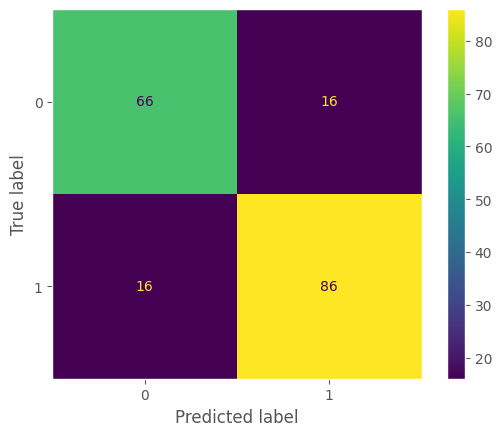

In [103]:
clr = CustomLinearRegression()

clr.fit(X_train, y_train)
y_pred = clr.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.grid(False)
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
append_to_results(model_perfs, extract_results(report_dict, name='Linear regression'), check_duplicates=True)

### 2. Logistic Regression

We will perform grid search on the parameters for logistic regression.

In [87]:
lgr_params = {
    'C': [0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1, 2, 5, 8],
    'solver': ['liblinear', 'sag', 'lbfgs', 'newton-cg'],
}

lgr = LogisticRegression(random_state=23)
lgr_results = grid_search(lgr, lgr_params)

100%|██████████| 48/48 [00:02<00:00, 18.02it/s]


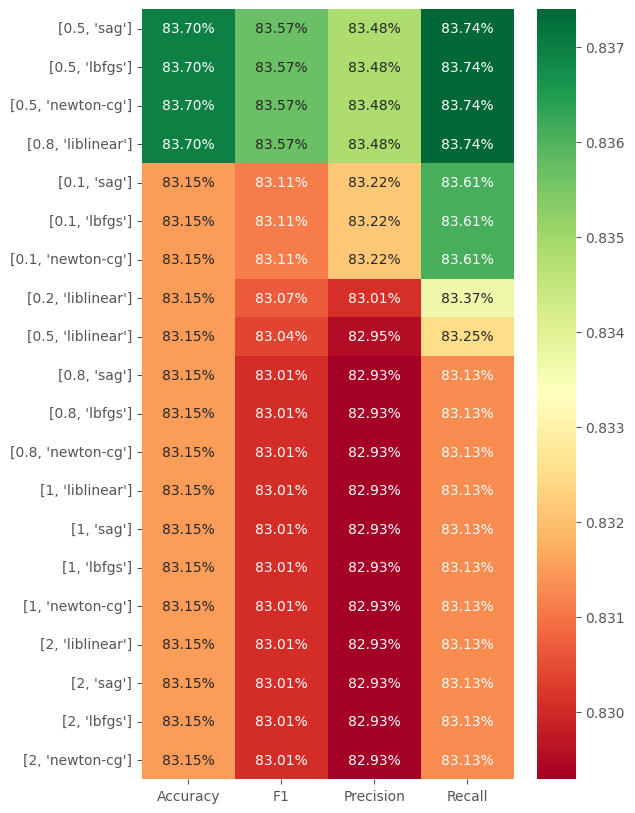

In [88]:
sns.heatmap(lgr_results, annot=True, cmap='RdYlGn', fmt='.2%', yticklabels=1)
fig = plt.gcf()
fig.set_size_inches(6, 10)
plt.show()

The best results are achieved by `C = 0.5` and `solver = 'sag'`.

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        82
           1       0.87      0.83      0.85       102

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



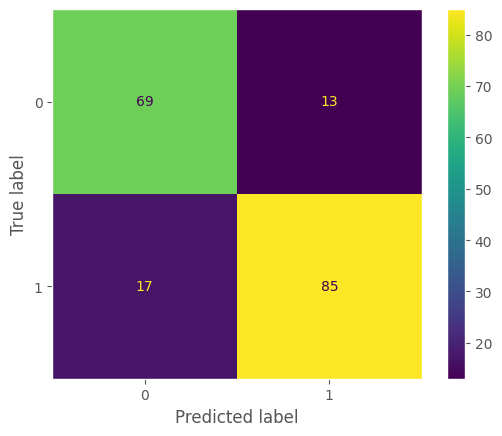

In [105]:
lgr = LogisticRegression(C=0.5, solver='sag', random_state=23)

lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.grid(False)
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
append_to_results(model_perfs, extract_results(report_dict, name='Logistic regression'), check_duplicates=True)

### 3. Naive Bayes

We will try the Gaussian and Bernoulli distributions for Naive Bayes.

#### Gaussian

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        82
           1       0.79      0.88      0.83       102

    accuracy                           0.80       184
   macro avg       0.81      0.79      0.80       184
weighted avg       0.81      0.80      0.80       184



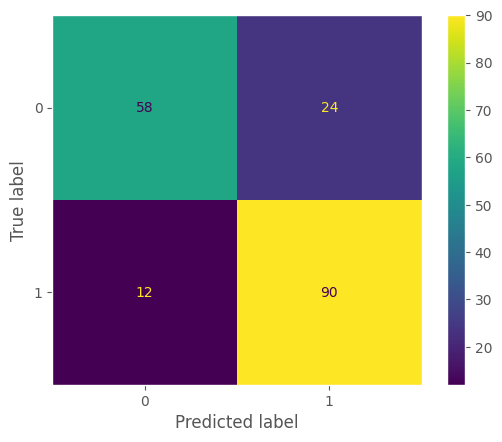

In [106]:
nb_gaussian = GaussianNB()

nb_gaussian.fit(X_train, y_train)
y_pred = nb_gaussian.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.grid(False)
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
append_to_results(model_perfs, extract_results(report_dict, name='Gaussian Naive Bayes'), check_duplicates=True)

#### Bernoulli

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        82
           1       0.87      0.80      0.84       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



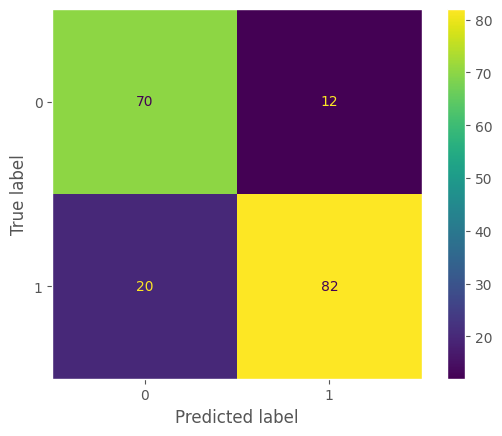

In [107]:
nb_bernoulli = BernoulliNB()

nb_bernoulli.fit(X_train, y_train)
y_pred = nb_bernoulli.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.grid(False)
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
append_to_results(model_perfs, extract_results(report_dict, name='Bernoulli Naive Bayes'), check_duplicates=True)

### 4. Decision Tree

We will first use random search to narrow down the parameters of the decision tree.

Then, we use grid search near the random search result.

In [109]:
dtc_params_random = {
    'criterion'        : ['gini', 'entropy'],
    'max_depth'        : [None, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10, 20, 40],
    'min_samples_leaf' : [1, 2, 5, 10, 20],
    'max_features'     : [None, 'sqrt', 'log2'],
}

dtc = DecisionTreeClassifier(random_state=23)
dtc_results_random = randomized_search(dtc, dtc_params_random)

100%|██████████| 100/100 [00:03<00:00, 31.53it/s]


In [110]:
dtc_results_random.head(5)

,Accuracy,F1,Precision,Recall
"[gini, 4, sqrt, 20, 5]",0.820652,0.817805,0.819349,0.816714
"[entropy, 4, log2, 20, 20]",0.820652,0.817805,0.819349,0.816714
"[gini, 4, log2, 20, 5]",0.820652,0.817805,0.819349,0.816714
"[gini, 4, log2, 20, 20]",0.820652,0.817805,0.819349,0.816714
"[entropy, 4, sqrt, 2, 40]",0.820652,0.817805,0.819349,0.816714


In [114]:
dtc_params_grid = {
    'criterion'        : ['gini'],
    'max_depth'        : [4, 5, 6],
    'min_samples_split': [5, 10, 15, 20, 25],
    'min_samples_leaf' : [10, 12, 15, 18, 20],
    'max_features'     : ['sqrt', 'log2'],
}

dtc = DecisionTreeClassifier(random_state=23)
dtc_results_grid = grid_search(dtc, dtc_params_grid)

100%|██████████| 150/150 [00:05<00:00, 26.39it/s]


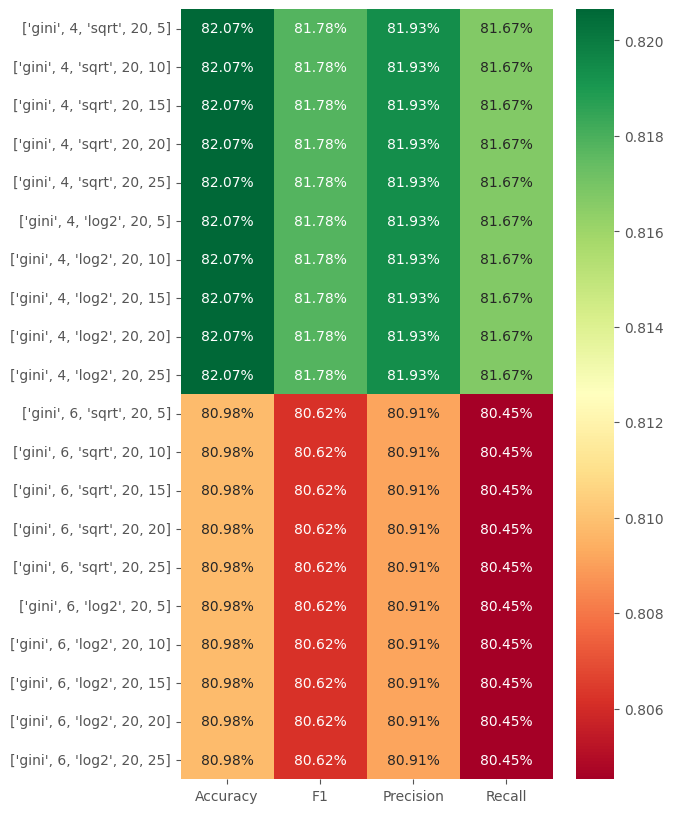

In [115]:
sns.heatmap(dtc_results_grid, annot=True, cmap='RdYlGn', fmt='.2%', yticklabels=1)
fig = plt.gcf()
fig.set_size_inches(6, 10)
plt.show()

The best hyperparameters are `criterion = 'gini'`, `max_depth = 4`, `max_features = 'sqrt'`, `min_samples_leaf = 20`, and `min_samples_split = 5`.

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        82
           1       0.83      0.85      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



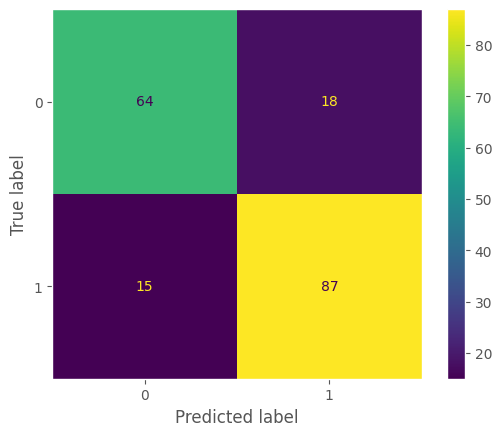

In [116]:
dtc = DecisionTreeClassifier(random_state=23,
                             criterion = 'gini',
                             max_depth = 4,
                             max_features = 'sqrt',
                             min_samples_leaf = 20,
                             min_samples_split = 5)

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.grid(False)
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
append_to_results(model_perfs, extract_results(report_dict, name='Decision tree'), check_duplicates=True)

### 5. Random Forest

Similar to the decision tree, we will use randomized search followed by grid search to find the best hyperparameters.

In [117]:
rfc_params_random = {
    'n_estimators'     : [int(x) for x in np.linspace(100, 400, 31)],
    'max_features'     : ['sqrt', 'log2', None],
    'max_depth'        : [int(x) for x in np.linspace(3, 8, 6)] + [None],
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50],
    'min_samples_leaf' : [1, 2, 4, 6, 10, 20, 30],
    'bootstrap'        : [True, False],
}

rfc = RandomForestClassifier(random_state=23)
rfc_results_random = randomized_search(rfc, rfc_params_random)

100%|██████████| 100/100 [00:56<00:00,  1.77it/s]


In [118]:
rfc_results_random.head(5)

,Accuracy,F1,Precision,Recall
"[False, 7, log2, 2, 2, 180]",0.836957,0.834592,0.835577,0.833812
"[False, None, log2, 6, 50, 220]",0.836957,0.834592,0.835577,0.833812
"[False, 7, sqrt, 10, 10, 300]",0.831522,0.829706,0.829357,0.830105
"[True, None, sqrt, 2, 5, 260]",0.831522,0.829706,0.829357,0.830105
"[True, 8, log2, 4, 20, 290]",0.831522,0.829298,0.829738,0.828910


In [120]:
rfc_params_grid = {
    'n_estimators'     : [170, 180, 190],
    'max_features'     : ['sqrt', 'log2'],
    'max_depth'        : [6, 7, 8] + [None],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf' : [1, 2, 3],
    'bootstrap'        : [False],
}

rfc = RandomForestClassifier(random_state=23)
rfc_results_grid = grid_search(rfc, rfc_params_grid)

100%|██████████| 216/216 [01:26<00:00,  2.49it/s]


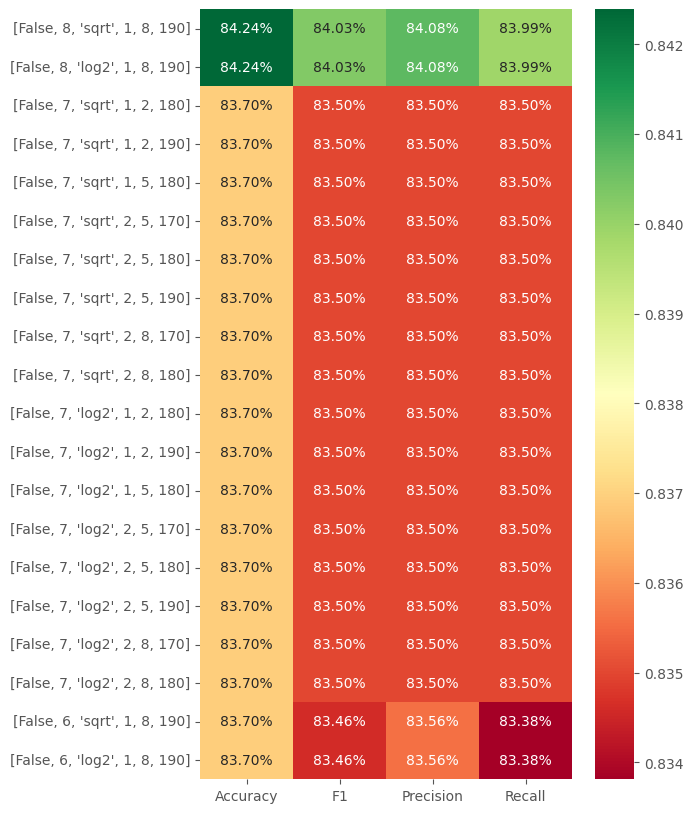

In [121]:
sns.heatmap(rfc_results_grid, annot=True, cmap='RdYlGn', fmt='.2%', yticklabels=1)
fig = plt.gcf()
fig.set_size_inches(6, 10)
plt.show()

The result with the best hyperparameters is as follows.

              precision    recall  f1-score   support

           0       0.83      0.82      0.82        82
           1       0.85      0.86      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



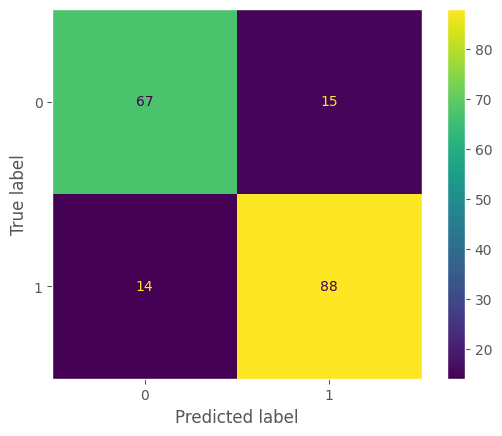

In [125]:
rfc = RandomForestClassifier(random_state=23,
                             n_estimators=190,
                             max_features='sqrt',
                             max_depth=8,
                             min_samples_split=8,
                             min_samples_leaf=1,
                             bootstrap=False)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.grid(False)
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
append_to_results(model_perfs, extract_results(report_dict, name='Random forest'), check_duplicates=True)

### 6. SVM

We will again perform randomized search followed by grid search to find the best hyperparameters.

In [129]:
svc_params_random = {
    'kernel': ['poly', 'rbf'],
    'C'     : [x for x in np.logspace(-2, 2, 9)],
    'degree': [1, 2, 3, 4, 5, 6],
    'gamma' : [x for x in np.logspace(-2, 1, 7)] + ['auto', 'scale']
}

svc = SVC(random_state=23)
svc_results_random = randomized_search(svc, svc_params_random)

100%|██████████| 100/100 [00:13<00:00,  7.19it/s]


In [132]:
svc_results_random.head(5)

,Accuracy,F1,Precision,Recall
"[0.1, 1, 3.1622776601683795, poly]",0.831522,0.829706,0.829357,0.830105
"[3.1622776601683795, 1, 0.31622776601683794, poly]",0.831522,0.829706,0.829357,0.830105
"[100.0, 1, scale, poly]",0.831522,0.829298,0.829738,0.828910
"[0.1, 6, 0.31622776601683794, poly]",0.831522,0.828847,0.830440,0.827714
"[3.1622776601683795, 3, 0.03162277660168379, rbf]",0.831522,0.827814,0.832844,0.825323


It seems that the polynomial kernel generally performs better.

In [135]:
svc_params_grid = {
    'kernel': ['poly'],
    'C'     : [x for x in np.logspace(-1, 1, 17)],
    'degree': [1, 2],
    'gamma' : [x for x in np.logspace(-1, 1, 17)] + ['auto']
}

svc = SVC(random_state=23)
svc_results_grid = grid_search(svc, svc_params_grid)

100%|██████████| 612/612 [17:24<00:00,  1.71s/it]


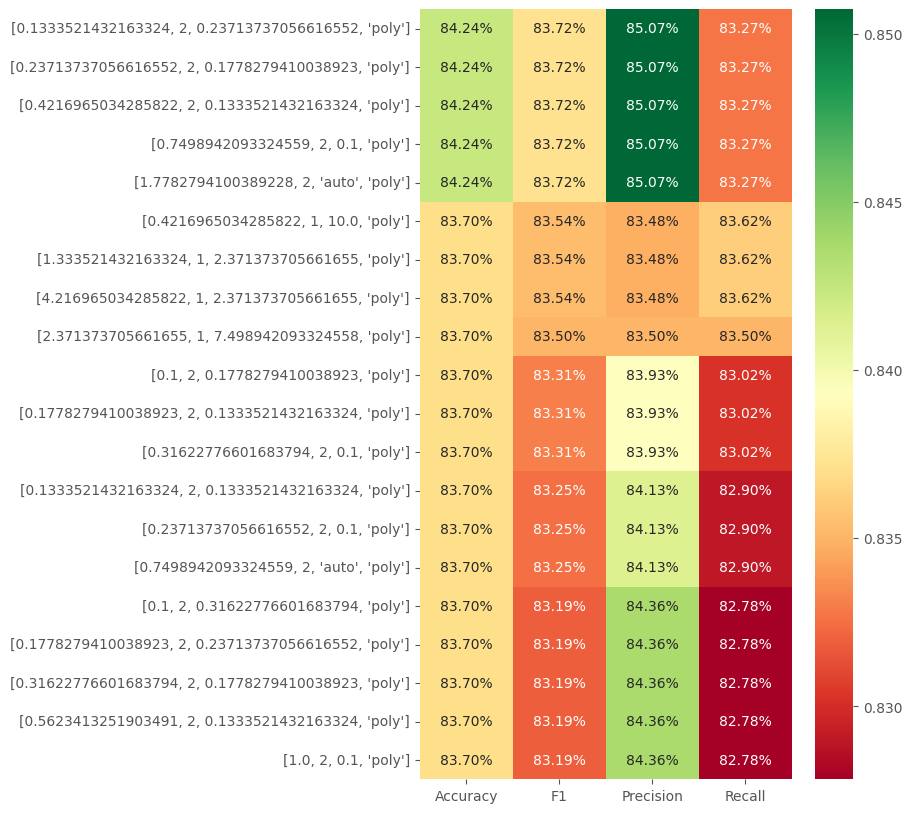

In [136]:
sns.heatmap(svc_results_grid, annot=True, cmap='RdYlGn', fmt='.2%', yticklabels=1)
fig = plt.gcf()
fig.set_size_inches(6, 10)
plt.show()

The result with the best hyperparameters is as follows.

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        82
           1       0.82      0.92      0.87       102

    accuracy                           0.84       184
   macro avg       0.85      0.83      0.84       184
weighted avg       0.85      0.84      0.84       184



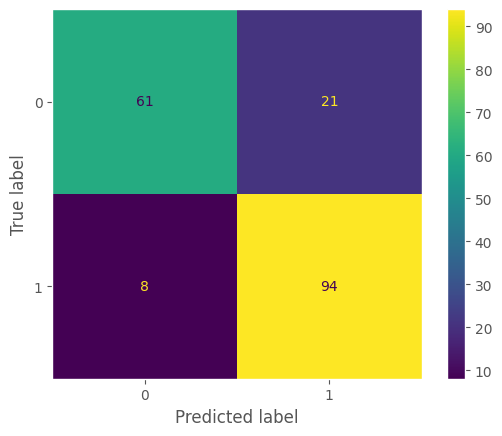

In [139]:
svc = SVC(random_state=23,
          kernel='poly',
          C=0.1333521432163324,
          degree=2,
          gamma=0.23713737056616552)

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.grid(False)
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
append_to_results(model_perfs, extract_results(report_dict, name='SVM'), check_duplicates=True)

### 7. Gradient Boosting

We also do a randomized search followed by a grid search because of the large number of parameters.

In [140]:
gbc_params_random = {
    'n_estimators' : [100, 150, 200, 250, 300],
    'subsample'    : [0.5, 0.7, 0.8, 1],
    'max_features' : [None, 'sqrt', 'log2'],
    'learning_rate': [0.2, 0.5, 0.75, 1.0, 1.25, 1.5],
    'max_depth'    : [None, 6, 7, 8, 9, 10]
}

gbc = GradientBoostingClassifier(random_state=23)
gbc_results_random = randomized_search(gbc, gbc_params_random)

100%|██████████| 100/100 [00:58<00:00,  1.70it/s]


In [141]:
gbc_results_random.head(5)

,Accuracy,F1,Precision,Recall
"[0.75, 10, sqrt, 300, 0.8]",0.831522,0.829298,0.829738,0.828910
"[0.5, 8, log2, 100, 1]",0.831522,0.829298,0.829738,0.828910
"[0.2, None, log2, 300, 0.7]",0.831522,0.828847,0.830440,0.827714
"[1.25, 7, log2, 200, 1]",0.831522,0.828847,0.830440,0.827714
"[0.5, 10, log2, 150, 0.5]",0.826087,0.824008,0.824008,0.824008


In [144]:
gbc_params_grid = {
    'n_estimators' : [200, 250, 300],
    'subsample'    : [0.8, 0.85, 0.9],
    'max_features' : ['sqrt'],
    'learning_rate': [0.45, 0.6, 0.75],
    'max_depth'    : [9, 10, 11]
}

gbc = GradientBoostingClassifier(random_state=23)
gbc_results_grid = grid_search(gbc, gbc_params_grid)

100%|██████████| 81/81 [01:03<00:00,  1.27it/s]


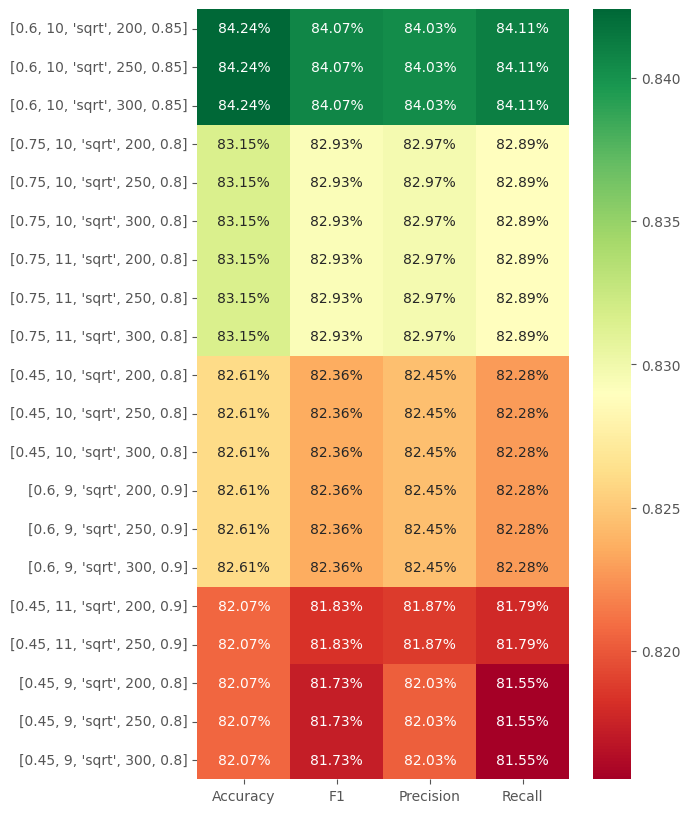

In [145]:
sns.heatmap(gbc_results_grid, annot=True, cmap='RdYlGn', fmt='.2%', yticklabels=1)
fig = plt.gcf()
fig.set_size_inches(6, 10)
plt.show()

The result with the best hyperparameters is as follows.

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        82
           1       0.86      0.85      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



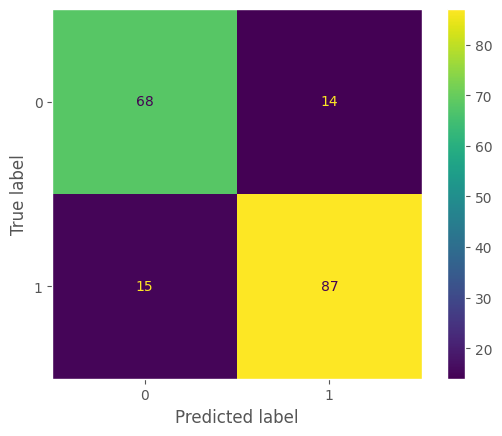

In [146]:
gbc = GradientBoostingClassifier(random_state=23,
                                 n_estimators=200,
                                 subsample=0.85,
                                 max_features='sqrt',
                                 learning_rate=0.6,
                                 max_depth=10)

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.grid(False)
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
append_to_results(model_perfs, extract_results(report_dict, name='Gradient boosting'), check_duplicates=True)

### 8. XGBoost

Because there are a lot of hyperparameters that can be used in XGBoost, we tune them step by step.

#### Step 1. Tuning number of estimators

In [155]:
xgb1 = XGBClassifier(
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    scale_pos_weight=1,
    seed=23)

estimator_params = {
    'n_estimators': [int(x) for x in np.linspace(10, 500, 50)]
}

xgb1_results = grid_search(xgb1, estimator_params)
xgb1_results

100%|██████████| 50/50 [00:14<00:00,  3.50it/s]


,Accuracy,F1,Precision,Recall
[110],0.831522,0.829298,0.829738,0.828910
[40],0.831522,0.828847,0.830440,0.827714
[30],0.831522,0.828353,0.831472,0.826518
[80],0.826087,0.824008,0.824008,0.824008
[90],0.826087,0.824008,0.824008,0.824008
[100],0.826087,0.824008,0.824008,0.824008
[60],0.826087,0.823565,0.824519,0.822812
[120],0.826087,0.823565,0.824519,0.822812
[130],0.826087,0.823565,0.824519,0.822812
[140],0.826087,0.823565,0.824519,0.822812


#### Step 2. Tuning maximum depth and minimum child weight

In [156]:
xgb2 = XGBClassifier(
    learning_rate=0.05,
    n_estimators=110,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    scale_pos_weight=1,
    seed=23)

depth_weight_params = {
    'max_depth': [int(x) for x in np.linspace(3, 9, 7)],
    'min_child_weight': [int(x) for x in np.linspace(1, 5, 3)]
}

xgb2_results = grid_search(xgb2, depth_weight_params)
xgb2_results

100%|██████████| 21/21 [00:13<00:00,  1.56it/s]


,Accuracy,F1,Precision,Recall
"[3, 1]",0.836957,0.834592,0.835577,0.833812
"[6, 5]",0.836957,0.834592,0.835577,0.833812
"[8, 5]",0.836957,0.834592,0.835577,0.833812
"[9, 5]",0.836957,0.834592,0.835577,0.833812
"[4, 1]",0.831522,0.829298,0.829738,0.828910
"[4, 3]",0.831522,0.829298,0.829738,0.828910
"[5, 1]",0.831522,0.829298,0.829738,0.828910
"[5, 5]",0.831522,0.829298,0.829738,0.828910
"[7, 5]",0.831522,0.829298,0.829738,0.828910
"[3, 3]",0.831522,0.828847,0.830440,0.827714


#### Step 3. Tuning gamma

In [157]:
xgb3 = XGBClassifier(
    learning_rate=0.05,
    n_estimators=110,
    max_depth=3,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    scale_pos_weight=1,
    seed=23)

gamma_params = {
    'gamma': [x for x in np.linspace(0, 1, 11)]
}

xgb3_results = grid_search(xgb3, gamma_params)
xgb3_results

100%|██████████| 11/11 [00:07<00:00,  1.54it/s]


,Accuracy,F1,Precision,Recall
[0.8],0.842391,0.839890,0.841531,0.838714
[0.9],0.842391,0.839890,0.841531,0.838714
[0.0],0.836957,0.834592,0.835577,0.833812
[0.7000000000000001],0.836957,0.834592,0.835577,0.833812
[1.0],0.836957,0.834135,0.836478,0.832616
[0.30000000000000004],0.831522,0.829298,0.829738,0.828910
[0.4],0.831522,0.829298,0.829738,0.828910
[0.5],0.831522,0.829298,0.829738,0.828910
[0.6000000000000001],0.831522,0.829298,0.829738,0.828910
[0.1],0.826087,0.824008,0.824008,0.824008


#### Step 4. Tuning subsample and column subsample ratio

In [158]:
xgb4 = XGBClassifier(
    learning_rate=0.05,
    n_estimators=110,
    max_depth=3,
    min_child_weight=1,
    gamma=0.8,
    objective='binary:logistic',
    scale_pos_weight=1,
    seed=23)

sample_params = {
    'subsample': [x for x in np.linspace(0.4, 0.9, 6)],
    'colsample_bytree': [x for x in np.linspace(0.4, 0.9, 6)]
}

xgb4_results = grid_search(xgb4, sample_params)
xgb4_results

100%|██████████| 36/36 [00:06<00:00,  5.62it/s]


,Accuracy,F1,Precision,Recall
"[0.8, 0.8]",0.842391,0.839890,0.841531,0.838714
"[0.6000000000000001, 0.6000000000000001]",0.836957,0.835381,0.834762,0.836203
"[0.7000000000000001, 0.6000000000000001]",0.836957,0.835007,0.835007,0.835007
"[0.5, 0.5]",0.836957,0.834592,0.835577,0.833812
"[0.9, 0.8]",0.836957,0.834592,0.835577,0.833812
"[0.6000000000000001, 0.5]",0.831522,0.830071,0.829293,0.831301
"[0.7000000000000001, 0.5]",0.831522,0.830071,0.829293,0.831301
"[0.8, 0.5]",0.831522,0.830071,0.829293,0.831301
"[0.7000000000000001, 0.7000000000000001]",0.831522,0.829706,0.829357,0.830105
"[0.4, 0.5]",0.831522,0.829298,0.829738,0.828910


              precision    recall  f1-score   support

           0       0.84      0.80      0.82        82
           1       0.85      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



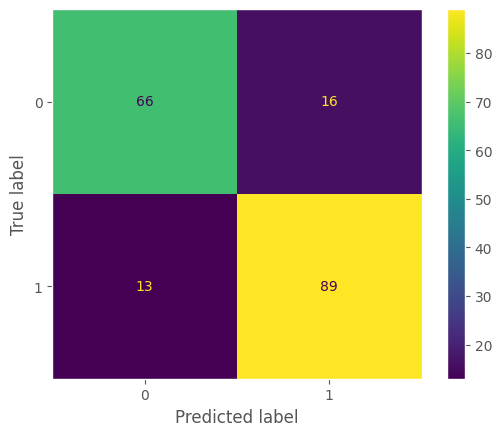

In [160]:
xgb = XGBClassifier(
    learning_rate=0.05,
    n_estimators=110,
    max_depth=3,
    min_child_weight=1,
    gamma=0.8,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    scale_pos_weight=1,
    seed=23)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.grid(False)
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
append_to_results(model_perfs, extract_results(report_dict, name='XGBoost'), check_duplicates=True)

## Summary of Models

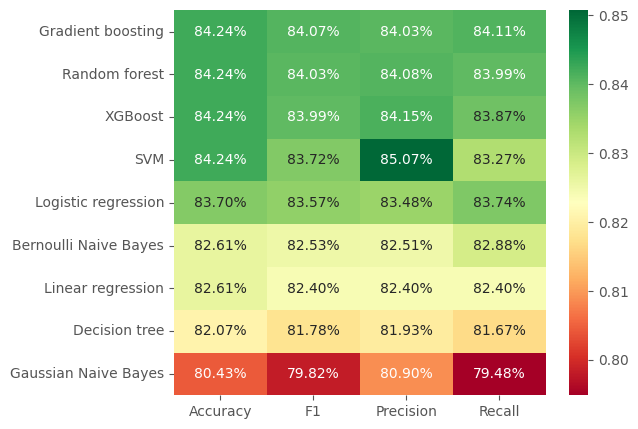

In [161]:
results_df = pd.DataFrame(model_perfs)
results_df = results_df.sort_values(by=sort_order, ascending=False)
results_df = results_df.set_index(results_df['Index'])
results_df = results_df.drop(columns=['Index'])
results_df.index.name = None

sns.heatmap(results_df, annot=True, cmap='RdYlGn', fmt='.2%', yticklabels=1)
fig = plt.gcf()
fig.set_size_inches(6, 5)
plt.show()

Gradient boosting has the best results overall.

When using only accuracy as the metric, the top four models are tied. However, gradient boosting ranks #1 in accuracy, F1, and recall score.

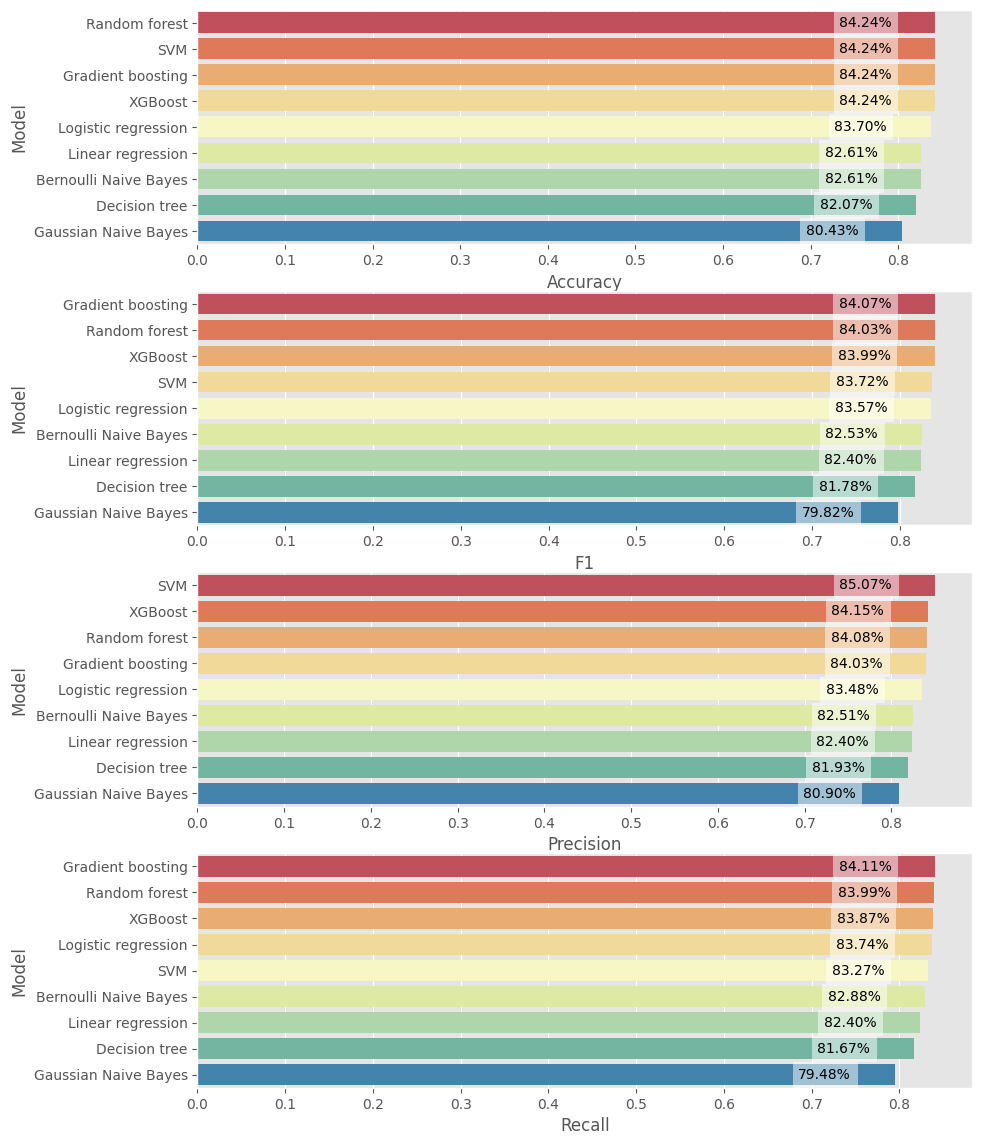

In [162]:
def plot_results(metric: str):
    data = results_df.sort_values(by=metric, ascending=False)
    ax = sns.barplot(x=metric, y='Model', data=data, palette='Spectral')

    for p in ax.patches:
        width = p.get_width()
        ax.text(width - 0.05,
                p.get_y() + p.get_height() / 2,
                '{:.2f}%'.format(100 * width),
                ha = 'right',
                va = 'center',
                bbox = dict(facecolor = 'white', edgecolor = 'white', alpha = 0.5))


results_df = pd.DataFrame(model_perfs).rename(columns={'Index': 'Model'})

plt.figure(figsize=(10,14))
plt.subplot(4, 1, 1)
plot_results('Accuracy')

plt.subplot(4, 1, 2)
plot_results('F1')

plt.subplot(4, 1, 3)
plot_results('Precision')

plt.subplot(4, 1, 4)
plot_results('Recall')

plt.show()

## Saving Model into File

We save the model into a file to be used in our application.

In [164]:
with open('gbc_model.pkl', 'wb') as model_file:
    pickle.dump(gbc, model_file)

We also save the scaler we used for standardization.

In [172]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)